# Feature Engineering, Decision Tree Pruning and Hyperparameter Tuning

### The Data
We will be using the dataset <em>incidents.csv</em>. 

This dataset contains 5000 cases and 13 features, including:

- city_name
- magnitude_of_delay
- delay_in_seconds
- affected_roads
- record_date
- luminosity
- avg_temperature
- avg_atm_pressure
- avg_humidity
- avg_wind_speed
- avg_precipitation
- avg_rain
- incidents

## Import Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the data

In [35]:
energy_1 = pd.read_csv('energia_202109-202112.csv')
energy_2 = pd.read_csv('energia_202201-202212.csv')
energy_test = pd.read_csv('energia_202301-202304.csv')

meteo_1 = pd.read_csv('meteo_202109-202112.csv')
meteo_2 = pd.read_csv('meteo_202201-202212.csv')
meteo_test = pd.read_csv('meteo_202301-202304.csv')

In [36]:
energy_1.columns

Index(['Data', 'Hora', 'Normal (kWh)', 'Horario Economico (kWh)',
       'Autoconsumo (kWh)', 'Injecao na rede (kWh)'],
      dtype='object')

In [37]:
energy_1.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2021-09-29,0,0.0,0.0,0.0,NaN
1,2021-09-29,1,0.0,0.0,0.0,NaN
2,2021-09-29,2,0.0,0.0,0.0,NaN
3,2021-09-29,3,0.0,0.0,0.0,NaN
4,2021-09-29,4,0.0,0.0,0.0,NaN


In [38]:
energy_2.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2022-01-01,0,0.0,0.486,0.0,NaN
1,2022-01-01,1,0.0,0.429,0.0,NaN
2,2022-01-01,2,0.0,0.463,0.0,NaN
3,2022-01-01,3,0.0,0.545,0.0,NaN
4,2022-01-01,4,0.0,0.439,0.0,NaN


In [39]:
energy_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horario Economico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
 5   Injecao na rede (kWh)    566 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 105.9+ KB


# Handling missing data and possible data transformations
- Remove missing values, outliers, and unnecessary rows/ columns
- Check and impute null values
- Check Imbalanced data
- Re-indexing and reformatting our data

## 1. Missing Values

<Axes: >

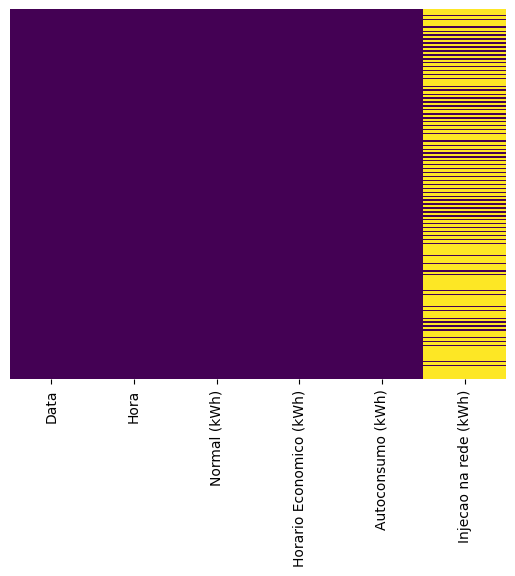

In [40]:
sns.heatmap(energy_1.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [41]:
energy_1.isnull().sum()

Data                          0
Hora                          0
Normal (kWh)                  0
Horario Economico (kWh)       0
Autoconsumo (kWh)             0
Injecao na rede (kWh)      1690
dtype: int64

### Drop or fill
Let's verify how the data is presented in the feature <em>Injecao na rede</em>

In [42]:
energy_1['Injecao na rede (kWh)'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Injecao na rede (kWh), dtype: object

In [43]:
energy_1[energy_1['Injecao na rede (kWh)'].isnull()]

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2021-09-29,0,0.000,0.000,0.0,NaN
1,2021-09-29,1,0.000,0.000,0.0,NaN
2,2021-09-29,2,0.000,0.000,0.0,NaN
3,2021-09-29,3,0.000,0.000,0.0,NaN
4,2021-09-29,4,0.000,0.000,0.0,NaN
...,...,...,...,...,...,...
2251,2021-12-31,19,2.176,0.000,0.0,NaN
2252,2021-12-31,20,0.732,0.000,0.0,NaN
2253,2021-12-31,21,0.704,0.000,0.0,NaN
2254,2021-12-31,22,0.000,0.424,0.0,NaN


Copy of the data to experiment the options

In [44]:
energy_1_m1 = energy_1.copy()
energy_1_m2 = energy_1.copy()

#### a) Drop

In [45]:
energy_1_m1.drop(['Injecao na rede (kWh)'], axis=1, inplace=True)
energy_1_m1.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh)
0,2021-09-29,0,0.0,0.0,0.0
1,2021-09-29,1,0.0,0.0,0.0
2,2021-09-29,2,0.0,0.0,0.0
3,2021-09-29,3,0.0,0.0,0.0
4,2021-09-29,4,0.0,0.0,0.0


#### b) Fill with zero

In [46]:
energy_1_m2.fillna(0, inplace=True)
energy_1_m2.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2021-09-29,0,0.0,0.0,0.0,0
1,2021-09-29,1,0.0,0.0,0.0,0
2,2021-09-29,2,0.0,0.0,0.0,0
3,2021-09-29,3,0.0,0.0,0.0,0
4,2021-09-29,4,0.0,0.0,0.0,0


We need to choose one of the options to keep going. We will choose to fill the column since it brings added value to our goal.

In [49]:
energy_1_copy = energy_1.fillna(0)
energy_1_copy.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2021-09-29,0,0.0,0.0,0.0,0
1,2021-09-29,1,0.0,0.0,0.0,0
2,2021-09-29,2,0.0,0.0,0.0,0
3,2021-09-29,3,0.0,0.0,0.0,0
4,2021-09-29,4,0.0,0.0,0.0,0


Let's see if there are still missing values

In [50]:
energy_1_copy.isnull().sum()

Data                       0
Hora                       0
Normal (kWh)               0
Horario Economico (kWh)    0
Autoconsumo (kWh)          0
Injecao na rede (kWh)      0
dtype: int64

In [51]:
energy_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horario Economico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
 5   Injecao na rede (kWh)    2256 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 105.9+ KB


In [52]:
energy_1_copy.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2021-09-29,0,0.0,0.0,0.0,0
1,2021-09-29,1,0.0,0.0,0.0,0
2,2021-09-29,2,0.0,0.0,0.0,0
3,2021-09-29,3,0.0,0.0,0.0,0
4,2021-09-29,4,0.0,0.0,0.0,0


There are features that are of the type <em>object</em>: <em>Data</em> and <em>Injecao na rede (kWh)</em>.

Let's see how many different values each feature has.

In [53]:
energy_1_copy.nunique()

Data                        94
Hora                        24
Normal (kWh)               772
Horario Economico (kWh)    329
Autoconsumo (kWh)          440
Injecao na rede (kWh)        5
dtype: int64

The features <em>city_name</em> and <em>avg_precipitation</em> have only one value. We will start with <em>avg_precipitation</em>:

In [54]:
energy_1_copy['Injecao na rede (kWh)'].nunique()

5

In [55]:
energy_1_copy['Injecao na rede (kWh)'].describe()

count     2256
unique       5
top          0
freq      1690
Name: Injecao na rede (kWh), dtype: int64

## 2. Handling categoric data

Feature <em>city_name</em>

In [24]:
data['city_name'].head()

0    Guimaraes
1    Guimaraes
2    Guimaraes
3    Guimaraes
4    Guimaraes
Name: city_name, dtype: object

The unique value of <em>city_name</em> is <em>Guimarães</em>. We can drop this feature as well.

In [25]:
data.drop(['city_name'], axis=1, inplace=True)
data.dropna(inplace=True)

Let's see the feature <em>incidents</em>:

In [26]:
data['incidents'].value_counts()

incidents
High         1073
Low           718
Very_High     603
Medium        578
Name: count, dtype: int64

In [27]:
data['incidents'].value_counts().count()

4

Let's create a barplot of <em>Frequency Distribution of Incidents</em> (style="darkgrid", fontsize=12)

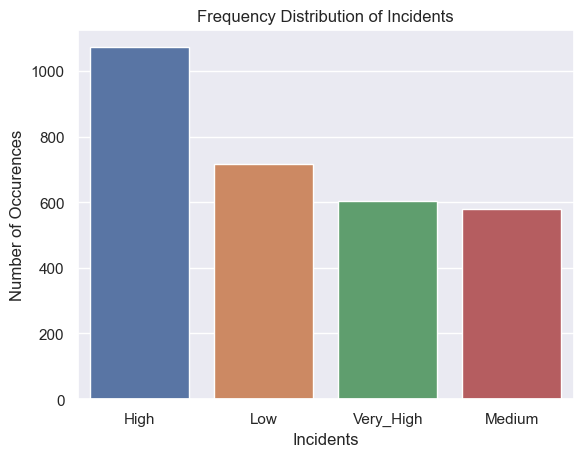

In [28]:
incidents_count = data['incidents'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=incidents_count.index, y=incidents_count.values)
plt.title('Frequency Distribution of Incidents')
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Incidents', fontsize=12)
plt.show()

Let's create a pie plot of <em>Category Distribution of Incidents</em>

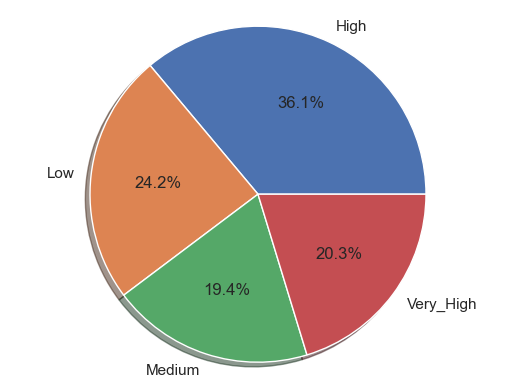

In [29]:
labels = data['incidents'].astype('category').cat.categories.tolist()
counts = data['incidents'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

We have several options how to deal with qualitative data:

#### a) Replace Values

Again, we are using data copies to experiment all options.

In [31]:
data_r1=data.copy()
data_r1.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High
5,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,Medium
6,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,Sem Chuva,Low


We need to create a dictionary assigning the string to a numeric value:

None - 0, Low - 1, Medium - 2, High - 3, Very_High - 4

We can create a replacement map in other way:

In [33]:
labels = data_r1['incidents'].astype('category').cat.categories.tolist()
replace_map_comp = {'incidents' : {k:v for k,v in zip(labels, list(range(1,len(labels)+1)))}}
print(replace_map_comp)

{'incidents': {'High': 1, 'Low': 2, 'Medium': 3, 'Very_High': 4}}


In [34]:
data_r1.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High
5,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,Medium
6,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,Sem Chuva,Low


Now we need to replace with the new values:

In [35]:
data_r1.replace(replace_map_comp,inplace=True)
data_r1.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,2
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,4
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,1
5,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,3
6,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,Sem Chuva,2


Done! Now we can see that the type of values are <em>int64</em>:

In [37]:
print(data_r1['incidents'].dtypes)

int64


#### b) Label encoding

In [38]:
data_r2=data.copy()
data_r2.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High
5,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,Medium
6,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,Sem Chuva,Low


In [39]:
print(data_r2.dtypes)

magnitude_of_delay     object
delay_in_seconds        int64
record_date            object
luminosity             object
avg_temperature       float64
avg_atm_pressure      float64
avg_humidity          float64
avg_wind_speed        float64
avg_rain               object
incidents              object
dtype: object


Similar to the previous examples, each string will be assigned a number. Instead of replacing the values under the column <em>incidents</em>, we are going to create a new colum to each created label.

In [41]:
data_r2['None'] = np.where(data_r2['incidents'].str.contains('None'), 1, 0)
data_r2.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,None
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,0
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,0
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,0
5,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,Medium,0
6,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,Sem Chuva,Low,0


To complete the process, it is needed to replicate for each label and then drop the column <em>incidents</em>.

Let's see another way to label encoding. This uses the <em>LabelEncoder</em> from <em>sklearn</em>.

In [42]:
data_r2_sk1 = data.copy()
data_r22=data.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data_r2_sk1['incidents_code'] = lb_make.fit_transform(data_r22['incidents'])

data_r2_sk1.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,incidents_code
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,1
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,3
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,0
5,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,Medium,2
6,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,Sem Chuva,Low,1


It creates a new column, <em>incidents_code</em>, with the labels assigned to feature <em>incidents</em>. The numeric values were assigned randomly, being the crescent order not apllicable to the meaning of the qualifying words.

#### c) One-Hot encoding

This alternative uses <em>LabelBinarizer</em> of <em>sklearn</em> and creates a matrix with bits regarding each label.

In [44]:
data_r3 = data.copy()

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(data_r3['incidents'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

lb_results_df.head()

,High,Low,Medium,Very_High
0,0,1,0,0
1,0,0,0,1
2,1,0,0,0
3,0,0,1,0
4,0,1,0,0


In [46]:
result_df = pd.concat([data_r3, lb_results_df], axis=1)
result_df.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,High,Low,Medium,Very_High
2,UNDEFINED,69.0,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,1.0,0.0,0.0,0.0
3,MAJOR,2297.0,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,0.0,0.0,1.0,0.0
4,UNDEFINED,0.0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,0.0,1.0,0.0,0.0
5,UNDEFINED,0.0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,Medium,1.0,0.0,0.0,0.0
6,UNDEFINED,0.0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,Sem Chuva,Low,0.0,0.0,0.0,1.0


#### d) Binary Encoding
Similar to the previous technique, it creates a matrix of the status of the values, but this time with binary values. See the comparison between techniques below:

|   Level   | "Decimal encoding" | Binary encoding | One-Hot encoding |
| :-------: | :----------------: | :-------------: | :--------------: |
| None      |         0          |       000       |      000001      |
| Low       |         1          |       001       |      000010      |
| Medium    |         2          |       010       |      000100      |
| High      |         3          |       011       |      001000      |
| Very_High |         4          |       100       |      010000      |

For this technique it is needed to have the <em>category_encoders</em> installed:
<code>!pip install category_encoders</code>

In [50]:
data_r4 = data.copy()

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['incidents'])
df_binary = encoder.fit_transform(data_r4)

df_binary.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents_0,incidents_1,incidents_2
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,0,0,1
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,0,1,0
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,0,1,1
5,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,1,0,0
6,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,Sem Chuva,0,0,1


#### e) Backward difference encoding
The values are normalized in the range of -1 to 1.

In [51]:
data_r5 = data.copy()

encoder = ce.BackwardDifferenceEncoder(cols=['incidents'])
df_bd = encoder.fit_transform(data_r5)

df_bd.head()

C:\Users\nseip\miniconda3\envs\aula1\lib\site-packages\category_encoders\base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
C:\Users\nseip\miniconda3\envs\aula1\lib\site-packages\category_encoders\base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


,intercept,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents_0,incidents_1,incidents_2
2,1,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,-0.75,-0.5,-0.25
3,1,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,0.25,-0.5,-0.25
4,1,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,0.25,0.5,-0.25
5,1,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,0.25,0.5,0.75
6,1,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,Sem Chuva,-0.75,-0.5,-0.25


#### f) Factorize
This technique encodes the object as an enumerated type or categorical variable.

We will choose the factorize technique to keep going.

Other option would it be to filter the <em>NaN</em> values when reading the CSV file:

<code>data = pd.read_csv('incidents.csv', na_filter=False)</code>

Regarding the features <em>magnitude_delay</em>, <em>luminosity</em> and <em>avg_rain</em>, we will factorize for now.

## 3. Handling dates

Datetime Properties and Methods (https://pandas.pydata.org/pandas-docs/version/0.23/api.html#datetimelike-properties)

We are going to convert the dates from <em>object</em> to <em>datetime</em>, specifying the format we want:

We can extract parts of the date and create new columns with that:

Since the year and the minute have only one value, we will drop it.

Other functions to deal with dates

We can use <em>datetime.today</em> and fetch the actual date.

It can be measured the time elapsed between the dates on the dataset and today.

And we can also separate each component of the date by day, month, hour, time, etc.

Now we need to choose how to deal with the <em>record_date</em>.

There are other features that need to be worked on, but it's up to you now!

# Exploratory Data Analysis

Time to put your data viz skills to the test! Try to recreate the following plots, make sure to import the libraries you'll need!

Let's analyze through a heatmap

We can see that there is a relation between 
- <em>magnitude_of_delay</em> and <em>delay_in_seconds</em>
- <em>magnitude_of_delay</em> and <em>record_date</em>
- <em>avg_humidity</em> and <em>luminosity<em>

Let's see with a pairplot

It's hard to analyze the relation of all features. Let's create jointplots between the features with notice a relationship.

Jointplot of <em>Magnitude_of_delay vs. Delay_in_seconds</em>

Jointplot <em>Luminosity vs. Avg_temperature</em>

Jointplot <em>Avg_humidity vs. Delay_in_seconds</em>

Jointplot <em>Avg_temperature vs. Avg_humidity</em>

It seems there are a relation between <em>Avg_temperature</em> and <em>Avg_humidity</em>. Let´s create a lmplot <em>Avg_temperature vs. Avg_humidity</em>